In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier 
import matplotlib.pyplot as plt
from sklearn import tree

In [3]:
df = pd.read_csv('train_clean.csv')

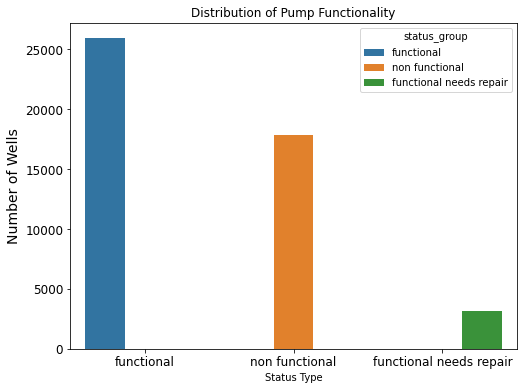

In [4]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x='status_group', hue="status_group", data=df)

plt.title('Distribution of Pump Functionality')
plt.xlabel('Status Type')
plt.ylabel("Number of Wells", fontsize=14)
plt.tick_params(labelsize='large')
plt.show()

In [5]:
df.head()

,Unnamed: 0,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,source_class,waterpoint_type_group,status_group
0,0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,1999,gravity,user-group,annually,good,enough,spring,groundwater,communal standpipe,functional
1,2,34310,25.0,2013-02-25,Lottery Club,686,World Vision,37.460664,-3.821329,Kwa Mahundi,...,2009,gravity,user-group,per bucket,good,enough,dam,surface,communal standpipe,functional
2,3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,1986,submersible,user-group,never pay,good,dry,borehole,groundwater,communal standpipe,non functional
3,5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,...,2009,submersible,user-group,per bucket,salty,enough,other,unknown,communal standpipe,functional
4,6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,...,1997,handpump,user-group,never pay,good,enough,borehole,groundwater,hand pump,non functional


In [6]:
df = df.drop(['Unnamed: 0','date_recorded'], axis=1)

In [7]:
df.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,...,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,source_class,waterpoint_type_group,status_group
0,69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,none,Lake Nyasa,Mnyusi B,...,1999,gravity,user-group,annually,good,enough,spring,groundwater,communal standpipe,functional
1,34310,25.0,Lottery Club,686,World Vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,...,2009,gravity,user-group,per bucket,good,enough,dam,surface,communal standpipe,functional
2,67743,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,...,1986,submersible,user-group,never pay,good,dry,borehole,groundwater,communal standpipe,non functional
3,9944,20.0,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,Pangani,Moa/Mwereme,...,2009,submersible,user-group,per bucket,salty,enough,other,unknown,communal standpipe,functional
4,19816,0.0,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,Internal,Ishinabulandi,...,1997,handpump,user-group,never pay,good,enough,borehole,groundwater,hand pump,non functional


# Test Tree

In [8]:
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year
count,46962.000000,46962.000000,46962.000000,46962.000000,46962.000000,46962.000000,46962.000000,46962.000000,46962.000000
mean,37115.876198,370.593978,721.301542,35.179871,-5.861588,14.705123,5.834547,181.671798,1996.815297
std,21443.914412,2867.433657,698.454483,2.684188,2.744181,17.468023,9.818294,478.183092,10.481792
min,2.000000,0.000000,-90.000000,29.607122,-11.649440,1.000000,0.000000,0.000000,1960.000000
25%,18560.250000,0.000000,0.000000,33.196012,-8.410366,5.000000,2.000000,0.000000,1994.000000
50%,37060.500000,0.000000,530.500000,35.353205,-5.108867,11.000000,3.000000,40.000000,1997.000000
75%,55665.750000,50.000000,1348.000000,37.404240,-3.375047,17.000000,5.000000,210.000000,2005.000000
max,74247.000000,250000.000000,2770.000000,40.323402,-0.998464,99.000000,80.000000,30500.000000,2013.000000


In [9]:
df_test1 = df.copy()

In [10]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46962 entries, 0 to 46961
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     46962 non-null  int64  
 1   amount_tsh             46962 non-null  float64
 2   funder                 46962 non-null  object 
 3   gps_height             46962 non-null  int64  
 4   installer              46962 non-null  object 
 5   longitude              46962 non-null  float64
 6   latitude               46962 non-null  float64
 7   wpt_name               46962 non-null  object 
 8   basin                  46962 non-null  object 
 9   subvillage             46962 non-null  object 
 10  region                 46962 non-null  object 
 11  region_code            46962 non-null  int64  
 12  district_code          46962 non-null  int64  
 13  lga                    46962 non-null  object 
 14  ward                   46962 non-null  object 
 15  po

In [11]:
df_test1.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,...,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,source_class,waterpoint_type_group,status_group
0,69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,none,Lake Nyasa,Mnyusi B,...,1999,gravity,user-group,annually,good,enough,spring,groundwater,communal standpipe,functional
1,34310,25.0,Lottery Club,686,World Vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,...,2009,gravity,user-group,per bucket,good,enough,dam,surface,communal standpipe,functional
2,67743,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,...,1986,submersible,user-group,never pay,good,dry,borehole,groundwater,communal standpipe,non functional
3,9944,20.0,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,Pangani,Moa/Mwereme,...,2009,submersible,user-group,per bucket,salty,enough,other,unknown,communal standpipe,functional
4,19816,0.0,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,Internal,Ishinabulandi,...,1997,handpump,user-group,never pay,good,enough,borehole,groundwater,hand pump,non functional


In [12]:
df_test1 = df[['population', 'construction_year', 'extraction_type_class','waterpoint_type_group', 
               'status_group']]

df_test1 = pd.get_dummies(df_test1, columns=['extraction_type_class','waterpoint_type_group'])

X = df_test1.drop('status_group', axis=1)
y = df_test1['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

dt = DecisionTreeClassifier(random_state=1)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

accuracy_score(y_test, y_pred)

0.6478353442157558

In [13]:
df_test2 = df[['population', 'construction_year', 'extraction_type_class','waterpoint_type_group', 'source_class', 
               'scheme_management', 'status_group', 'basin']]

df_test2 = pd.get_dummies(df_test2, columns=['extraction_type_class','waterpoint_type_group', 'source_class', 
                                             'scheme_management', 'basin'])

X = df_test2.drop('status_group', axis=1)
y = df_test2['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

dt = DecisionTreeClassifier(random_state=1)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

accuracy_score(y_test, y_pred)

0.6914123491838183

In [14]:
df_test3 = df[['construction_year', 'waterpoint_type_group', 'quantity', 'quality_group', 'extraction_type_class', 
               'management_group', 'permit', 'basin', 'status_group']]

df_test3 = pd.get_dummies(df_test3, columns=['waterpoint_type_group', 'quality_group', 'extraction_type_class', 
                                             'quantity','management_group', 'permit', 'basin'])

X = df_test3.drop('status_group', axis=1)
y = df_test3['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

dt = DecisionTreeClassifier(random_state=1)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

accuracy_score(y_test, y_pred)

0.7538679914833215

In [15]:
df_test3 = df[['construction_year', 'waterpoint_type_group', 'quantity', 'quality_group', 'extraction_type_class', 
               'management_group', 'permit', 'basin', 'status_group', 'amount_tsh']]

df_test3 = pd.get_dummies(df_test3, columns=['waterpoint_type_group', 'quality_group', 'extraction_type_class', 
                                             'quantity','management_group', 'permit', 'basin', 'amount_tsh'])

X = df_test3.drop('status_group', axis=1)
y = df_test3['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

dt = DecisionTreeClassifier(random_state=1)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

accuracy_score(y_test, y_pred)

0.7621007806955288

In [6]:
X = df.drop('status_group', axis=1)
y = df['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [7]:
clf = DecisionTreeClassifier(max_depth=2, random_state = 1)

clf.fit(X_train, y_train)

ValueError: could not convert string to float: '2011-03-11'

In [27]:
train_df_clean = train_df.drop('scheme_name', axis=1).dropna()    # Remove nan

dt_mini_df = train_df_clean[['construction_year', 'waterpoint_type', 'quantity', 'water_quality', 'extraction_type', 'management', 'permit', 'basin', 'status_group']]

dt_mini_df = dt_mini_df.loc[dt_mini_df.construction_year != 0]

dt_mini_df = pd.get_dummies(dt_mini_df, columns=['waterpoint_type', 'water_quality', 'extraction_type', 'quantity', 'management', 'permit', 'basin'])


X = dt_mini_df.drop('status_group', axis=1)
y = dt_mini_df['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

dt = DecisionTreeClassifier(random_state=1)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

accuracy_score(y_test, y_pred)

KeyError: "['scheme_name'] not found in axis"

In [92]:
df1 = tree_train[['population', 'waterpoint_type_group', 'quality_group', 'extraction_type_class', 'status_group']]

df1 = pd.get_dummies(df1, columns=['waterpoint_type_group', 'quality_group', 'extraction_type_class'])


X = df1.drop('status_group', axis=1)
y = df1['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.50)

dt = DecisionTreeClassifier(random_state=1)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

accuracy_score(y_test, y_pred)

0.647693399574166

## 1st Simple Model

In [ ]:
mini_df = train_df[['population', 'status_group']]

mini_df['population'] = mini_df['population'].astype('float64')

In [ ]:
X = mini_df.drop('status_group', axis=1)
y = mini_df['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
pd.set_option('display.max_columns', None)

## 2nd Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier(max_depth=2, random_state = 1)

clf.fit(X_train, y_train)

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree


fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (3,3), dpi=300)
tree.plot_tree(clf,
               feature_names = train_df.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show();

# Test

In [60]:
df = train_df.drop(['date_recorded','num_private'], axis=1)
df

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,none,Lake Nyasa,Mnyusi B,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,Lake Victoria,Nyamara,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,Kyanyamisa,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,Pangani,Kiduruni,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,Rufiji,Igumbilo,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,NaN,0,NaN,34.017087,-8.750434,Mashine,Rufiji,Madungulu,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,Malec,0,Musa,35.861315,-6.378573,Mshoro,Rufiji,Mwinyi,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [61]:
X = df.drop('status_group', axis=1)
y = df['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [62]:
clf = DecisionTreeClassifier(max_depth=2, random_state = 1)

clf.fit(X_train, y_train)

ValueError: could not convert string to float: 'Wsdp'

In [63]:
train_df['num_private'].value_counts()

0      58643
6         81
1         73
5         46
8         46
       ...  
180        1
213        1
23         1
55         1
94         1
Name: num_private, Length: 65, dtype: int64

In [64]:
train_df['scheme_name'].isnull().sum()

28166

In [65]:
train_df['scheme_name']

0                              Roman
1                                NaN
2        Nyumba ya mungu pipe scheme
3                                NaN
4                                NaN
                    ...             
59395         Losaa Kia water supply
59396    Ikondo electrical water sch
59397                            NaN
59398                            NaN
59399                            NaN
Name: scheme_name, Length: 59400, dtype: object

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   basin                  59400 non-null  object 
 9   subvillage             59029 non-null  object 
 10  region                 59400 non-null  object 
 11  region_code            59400 non-null  int64  
 12  district_code          59400 non-null  int64  
 13  lga                    59400 non-null  object 
 14  ward                   59400 non-null  object 
 15  po

In [96]:
tree_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46962 entries, 0 to 59399
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             46962 non-null  float64
 1   funder                 46962 non-null  object 
 2   gps_height             46962 non-null  int64  
 3   installer              46962 non-null  object 
 4   longitude              46962 non-null  float64
 5   latitude               46962 non-null  float64
 6   wpt_name               46962 non-null  object 
 7   basin                  46962 non-null  object 
 8   subvillage             46962 non-null  object 
 9   region                 46962 non-null  object 
 10  region_code            46962 non-null  int64  
 11  district_code          46962 non-null  int64  
 12  lga                    46962 non-null  object 
 13  ward                   46962 non-null  object 
 14  population             46962 non-null  int64  
 15  pu

In [105]:
#Create an interactive map of homes
import folium
from folium.plugins import FastMarkerCluster
from branca.element import Template, MacroElement

#Create a blank map
map = folium.Map(location=[tree_train.latitude.mean(), 
                           tree_train.longitude.mean()], zoom_start=6, control_scale=True)

map

In [ ]:
#Create an interactive map of homes
import folium
from folium.plugins import FastMarkerCluster
from branca.element import Template, MacroElement

#Create a blank map
map = folium.Map(location=[train_new.latitude.mean(), 
                           train_new.longitude.mean()], zoom_start=6, control_scale=True)

#Index markers for homes Out of Seattle
for index, location_info in train_new.iterrows():
    folium.Marker([location_info["latitude"], location_info["longitude"]], popup=location_info["id"],icon=folium.Icon(color='blue',icon='none')).add_to(map)


map

In [106]:
train_new.longitude[train_df.longitude != 34.938093][0]

34.93809275

In [107]:
train_new.loc[train_new.longitude != 0]['longitude'].value_counts()

37.541579    2
32.967009    2
33.090347    2
33.006275    2
37.532778    2
            ..
37.422486    1
33.990412    1
32.956619    1
36.866855    1
35.005922    1
Name: longitude, Length: 46915, dtype: int64